# Data Preprocessing and Data Cleaning

1. Are any of the numerical data fields highly-correlated with each other?
2. Are there any missing data for each of the data fields?
3. Are there only a few values in a subset of your data field? Does the data field look very uniform (remove fields having low variability)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel('credit-data-training.xlsx')
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [3]:
df.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


In [5]:
#change credit-result into numbers
df['Credit-Application-Result'].unique()

array(['Creditworthy', 'Non-Creditworthy'], dtype=object)

In [6]:
df['Credit-Application-Result'] = df['Credit-Application-Result'].replace({'Creditworthy':1,'Non-Creditworthy':0})
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,1,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,1,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [8]:
print(df['Account-Balance'].unique())
print(df['Payment-Status-of-Previous-Credit'].unique())
print(df['Purpose'].unique())
print(df['Value-Savings-Stocks'].unique())
print(df['Length-of-current-employment'].unique())
print(df['Guarantors'].unique())
print(df['Concurrent-Credits'].unique())
print(df['No-of-Credits-at-this-Bank'].unique())

['Some Balance' 'No Account']
['Paid Up' 'No Problems (in this bank)' 'Some Problems']
['Other' 'Home Related' 'Used car' 'New car']
['£100-£1000' 'None' '< £100']
['< 1yr' '1-4 yrs' '4-7 yrs']
['None' 'Yes']
['Other Banks/Depts']
['1' 'More than 1']


In [9]:
print(df['Account-Balance'].value_counts())
print(df['Duration-of-Credit-Month'].value_counts())
print(df['Payment-Status-of-Previous-Credit'].value_counts())
print(df['Purpose'].value_counts())
print(df['Value-Savings-Stocks'].value_counts())
print(df['Length-of-current-employment'].value_counts())
print(df['Instalment-per-cent'].value_counts())
print(df['Guarantors'].value_counts())
print(df['Duration-in-Current-address'].value_counts())
print(df['Most-valuable-available-asset'].value_counts())
print(df['Concurrent-Credits'].value_counts())
print(df['Type-of-apartment'].value_counts())
print(df['No-of-Credits-at-this-Bank'].value_counts())
print(df['Occupation'].value_counts())
print(df['No-of-dependents'].value_counts())
print(df['Foreign-Worker'].value_counts())

No Account      262
Some Balance    238
Name: Account-Balance, dtype: int64
24    108
12     92
18     45
36     41
6      34
48     27
9      27
15     24
30     18
21     13
10     11
60      8
42      5
27      5
11      5
8       5
45      4
4       4
20      4
28      3
33      3
39      3
7       3
14      2
26      1
16      1
40      1
13      1
47      1
22      1
Name: Duration-of-Credit-Month, dtype: int64
Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: Payment-Status-of-Previous-Credit, dtype: int64
Home Related    355
Used car         83
New car          47
Other            15
Name: Purpose, dtype: int64
None          298
£100-£1000    154
< £100         48
Name: Value-Savings-Stocks, dtype: int64
< 1yr      279
4-7 yrs    124
1-4 yrs     97
Name: Length-of-current-employment, dtype: int64
4    246
2    109
3     79
1     66
Name: Instalment-per-cent, dtype: int64
None    457
Yes      43
Name: Guarantors, dtype: i

In [10]:
df.describe()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.000000,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,0.716000,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,0.451388,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,0.000000,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,0.000000,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,1.000000,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,1.000000,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,1.000000,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


Based on the value counts and describe above, remove the following columns:
1. Guarantors : low variability, the data is skewed towards 'None'.
2. Duration-in-Current-address : too much missing data.
3. Concurrent-Credits: the data is uniform.
4. Occupation: the data is uniform.
5. No-of-dependents: low variability, the data is skewed towards 1.
6. Foreign-Worker: low variability, the data is skewed towards 1.

Also, we need to remove Telephone column because it's irrelevant.

In [12]:
df_clean = df.drop(['Guarantors','Duration-in-Current-address','Concurrent-Credits','Occupation','No-of-dependents','Foreign-Worker','Telephone'],
                  axis = 1)
df_clean.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,1,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,NaN,2,1
1,1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,1,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1


In [16]:
median = df_clean['Age-years'].median()
median

33.0

In [20]:
# impute Age-years column with median because only a few data are missing and the data is not symmetrical.
df_clean_2 = df_clean.fillna({'Age-years':median})
df_clean_2.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,1,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,1,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1


In [21]:
df_clean_2.describe()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.716000,21.43400,3199.980000,3.010000,2.360000,35.574000,1.928000
std,0.451388,12.30742,2831.386861,1.113724,1.064268,11.369567,0.539814
min,0.000000,4.00000,276.000000,1.000000,1.000000,19.000000,1.000000
25%,0.000000,12.00000,1357.250000,2.000000,1.000000,27.000000,2.000000
50%,1.000000,18.00000,2236.500000,3.000000,3.000000,33.000000,2.000000
75%,1.000000,24.00000,3941.500000,4.000000,3.000000,41.000000,2.000000
max,1.000000,60.00000,18424.000000,4.000000,4.000000,75.000000,3.000000


,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment
Credit-Application-Result,1.000000,-0.202504,-0.201946,-0.062107,-0.141332,0.052914,-0.026516
Duration-of-Credit-Month,-0.202504,1.000000,0.573980,0.068106,0.299855,-0.064197,0.152516
Credit-Amount,-0.201946,0.573980,1.000000,-0.288852,0.325545,0.069316,0.170071
Instalment-per-cent,-0.062107,0.068106,-0.288852,1.000000,0.081493,0.039270,0.074533
Most-valuable-available-asset,-0.141332,0.299855,0.325545,0.081493,1.000000,0.086233,0.373101
Age-years,0.052914,-0.064197,0.069316,0.039270,0.086233,1.000000,0.329350
Type-of-apartment,-0.026516,0.152516,0.170071,0.074533,0.373101,0.329350,1.000000


<AxesSubplot:>

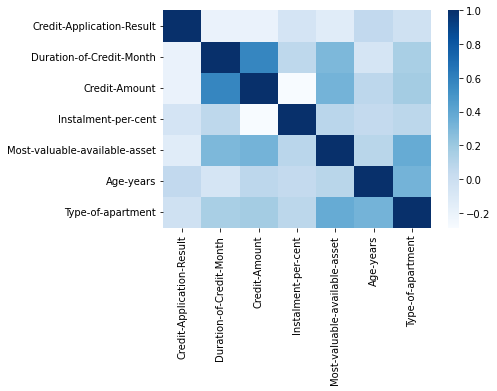

In [22]:
# check correlations
corr = df_clean_2.corr()
display(corr)

# plot a heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'Blues')

In [23]:
# make columns into dummy variables
account_balance_dummies = pd.get_dummies(df_clean_2['Account-Balance'],prefix = 'Account-Balance')
payment_status_of_previous_credit = pd.get_dummies(df_clean_2['Payment-Status-of-Previous-Credit'], prefix = 'Payment-Status-of-Previous-Credit')
purpose = pd.get_dummies(df_clean_2['Purpose'], prefix = 'Purpose')
value_savings_stocks = pd.get_dummies(df_clean_2['Value-Savings-Stocks'], prefix = 'Value-Savings-Stocks')
length_of_current_employment = pd.get_dummies(df_clean_2['Length-of-current-employment'], prefix = 'Length-of-current-employment')
no_of_credits_at_this_bank = pd.get_dummies(df_clean_2['No-of-Credits-at-this-Bank'], prefix = 'No-of-Credits-at-this-Bank')

In [24]:
df_clean_dummies = pd.concat([df_clean_2, account_balance_dummies, payment_status_of_previous_credit, purpose, 
                             value_savings_stocks, length_of_current_employment, no_of_credits_at_this_bank],axis = 1)
df_clean_dummies.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,...,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,1,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,...,1,0,0,0,1,0,0,1,1,0
1,1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,...,0,0,0,0,1,0,0,1,1,0
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,...,0,0,0,1,0,1,0,0,0,1
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,...,0,0,0,1,0,1,0,0,1,0
4,1,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,...,0,0,0,1,0,0,0,1,1,0


In [25]:
df_clean_dummies_2 = df_clean_dummies.drop(['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'],
                                          axis = 1)
df_clean_dummies_2.head()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),...,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,1,4,1494,1,1,33.0,2,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,1,4,1494,1,1,29.0,2,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,1,4,1544,2,1,42.0,2,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,1,4,3380,1,1,37.0,2,0,1,1,...,0,0,0,1,0,1,0,0,1,0
4,1,6,343,4,1,27.0,2,1,0,0,...,0,0,0,1,0,0,0,1,1,0


In [26]:
df_clean_dummies_2.describe()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),...,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.716000,21.43400,3199.980000,3.010000,2.360000,35.574000,1.928000,0.524000,0.476000,0.408000,...,0.030000,0.166000,0.096000,0.596000,0.308000,0.194000,0.248000,0.558000,0.640000,0.360000
std,0.451388,12.30742,2831.386861,1.113724,1.064268,11.369567,0.539814,0.499924,0.499924,0.491955,...,0.170758,0.372453,0.294886,0.491189,0.462129,0.395825,0.432284,0.497122,0.480481,0.480481
min,0.000000,4.00000,276.000000,1.000000,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.00000,1357.250000,2.000000,1.000000,27.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,18.00000,2236.500000,3.000000,3.000000,33.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,24.00000,3941.500000,4.000000,3.000000,41.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,60.00000,18424.000000,4.000000,4.000000,75.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
df_logistic_data = df_clean_dummies_2.copy()

In [30]:
Y = df_logistic_data['Credit-Application-Result']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Credit-Application-Result, dtype: int64

In [31]:
X = df_logistic_data.drop('Credit-Application-Result', axis = 1)
X.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,...,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,4,1494,1,1,33.0,2,0,1,0,1,...,1,0,0,0,1,0,0,1,1,0
1,4,1494,1,1,29.0,2,0,1,0,1,...,0,0,0,0,1,0,0,1,1,0
2,4,1544,2,1,42.0,2,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
3,4,3380,1,1,37.0,2,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0
4,6,343,4,1,27.0,2,1,0,0,1,...,0,0,0,1,0,0,0,1,1,0


In [105]:
#split dataset
X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split(X, Y, test_size = 0.3)

In [106]:
len(X_train_lr)

350

In [107]:
#build model
logistic_model = LogisticRegression()

In [108]:
logistic_model.fit(X_train_lr, Y_train_lr)

/Users/xuejunsui/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
# check the score of the model
logistic_model.score(X_test_lr, Y_test_lr)

0.8

# Change customers to score file into the same format

In [40]:
customers = pd.read_excel('customers-to-score.xlsx')
customers.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,None,4,3,31,Other Banks/Depts,2,1,1,1,1,1


In [41]:
customers.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.000000,500.000000,500.000000,500.000000,500.000,500.000000,500.000000,500.0,500.000000,500.000000,500.000000
mean,20.254000,3300.400000,2.954000,2.858000,2.338,35.626000,1.926000,1.0,1.166000,1.410000,1.040000
std,11.766664,2806.153898,1.119997,1.108284,1.044,11.296608,0.526382,0.0,0.372453,0.492326,0.196155
min,4.000000,250.000000,1.000000,1.000000,1.000,20.000000,1.000000,1.0,1.000000,1.000000,1.000000
25%,12.000000,1381.750000,2.000000,2.000000,1.000,27.000000,2.000000,1.0,1.000000,1.000000,1.000000
50%,18.000000,2370.500000,3.000000,3.000000,2.000,33.000000,2.000000,1.0,1.000000,1.000000,1.000000
75%,24.000000,3967.500000,4.000000,4.000000,3.000,42.000000,2.000000,1.0,1.000000,2.000000,1.000000
max,72.000000,15945.000000,4.000000,4.000000,4.000,74.000000,3.000000,1.0,2.000000,2.000000,2.000000


In [42]:
customers2 = customers.drop(['Guarantors','Duration-in-Current-address','Concurrent-Credits','Occupation','No-of-dependents','Foreign-Worker','Telephone'],
                  axis = 1)
customers2.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,1,36,1,More than 1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,1,39,1,More than 1
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,4,23,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,1,36,1,More than 1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,3,31,2,1


In [43]:
# make columns into dummy variables
account_balance_dummies = pd.get_dummies(customers2['Account-Balance'],prefix = 'Account-Balance')
payment_status_of_previous_credit = pd.get_dummies(customers2['Payment-Status-of-Previous-Credit'], prefix = 'Payment-Status-of-Previous-Credit')
purpose = pd.get_dummies(customers2['Purpose'], prefix = 'Purpose')
value_savings_stocks = pd.get_dummies(customers2['Value-Savings-Stocks'], prefix = 'Value-Savings-Stocks')
length_of_current_employment = pd.get_dummies(customers2['Length-of-current-employment'], prefix = 'Length-of-current-employment')
no_of_credits_at_this_bank = pd.get_dummies(customers2['No-of-Credits-at-this-Bank'], prefix = 'No-of-Credits-at-this-Bank')

In [45]:
customers_with_dummies = pd.concat([customers2, account_balance_dummies, payment_status_of_previous_credit, purpose, 
                             value_savings_stocks, length_of_current_employment, no_of_credits_at_this_bank], axis = 1)
customers_with_dummies.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,...,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,1,36,...,0,0,0,1,0,0,0,1,0,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,1,39,...,0,0,0,1,0,0,0,1,0,1
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,4,23,...,0,0,0,0,1,0,0,1,1,0
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,1,36,...,0,0,0,1,0,0,0,1,0,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,3,31,...,0,0,0,1,0,1,0,0,1,0


In [46]:
customers_clean = customers_with_dummies.drop(['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'],
                                          axis = 1)
customers_clean.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,...,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,9,2799,2,1,36,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,12,2122,3,1,39,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,24,3758,1,4,23,1,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
3,11,3905,2,1,36,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,6,1957,1,3,31,2,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0


In [47]:
# add the missing column because lack of 1 value during dummy variable split
customers_clean['Purpose_Other'] = 0
customers_clean['Purpose_Other'].head()

0    0
1    0
2    0
3    0
4    0
Name: Purpose_Other, dtype: int64

In [48]:
customers_clean.shape

(500, 23)

## Logistic regression model prediction

In [110]:
logistic_predict = logistic_model.predict(customers_clean)
logistic_predict

/Users/xuejunsui/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

# Decision Tree

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [51]:
decision_tree_data = df_clean_2.copy()
decision_tree_data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,1,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,1,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1


In [52]:
inputs = decision_tree_data.drop("Credit-Application-Result", axis = 1)
target = decision_tree_data['Credit-Application-Result']

In [53]:
inputs.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1
3,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1
4,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1


In [54]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Credit-Application-Result, dtype: int64

In [55]:
account_balance = LabelEncoder()
duration_of_credit_month = LabelEncoder()
payment_status_of_previous_credit = LabelEncoder()
purpose = LabelEncoder()
credit_amount = LabelEncoder()
value_savings_stocks = LabelEncoder()
length_of_current_employment = LabelEncoder()
instalment_percent = LabelEncoder()
most_valuable_available_asset = LabelEncoder()
age_years = LabelEncoder()
type_of_apartment = LabelEncoder()
no_of_credits_at_this_bank = LabelEncoder()

In [56]:
inputs['Account-Balance_n'] = account_balance.fit_transform(inputs['Account-Balance'])
inputs['Payment-Status-of-Previous-Credit_n'] = payment_status_of_previous_credit.fit_transform(inputs['Payment-Status-of-Previous-Credit'])
inputs['Purpose_n'] = purpose.fit_transform(inputs['Purpose'])
inputs['Value-Savings-Stocks_n'] = value_savings_stocks.fit_transform(inputs['Value-Savings-Stocks'])
inputs['Length-of-current-employment_n'] = length_of_current_employment.fit_transform(inputs['Length-of-current-employment'])
inputs['No-of-Credits-at-this-Bank_n'] = no_of_credits_at_this_bank.fit_transform(inputs['No-of-Credits-at-this-Bank'])

In [57]:
inputs.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1,1,1,2,2,2,0
1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1,1,1,0,2,2,0
2,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1,1,0,0,1,0,1
3,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1,1,0,0,1,0,0
4,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1,0,1,0,1,2,0


In [58]:
inputs_n = inputs.drop(['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'],
                      axis = 1)
inputs_n.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,4,1494,1,1,33.0,2,1,1,2,2,2,0
1,4,1494,1,1,29.0,2,1,1,0,2,2,0
2,4,1544,2,1,42.0,2,1,0,0,1,0,1
3,4,3380,1,1,37.0,2,1,0,0,1,0,0
4,6,343,4,1,27.0,2,0,1,0,1,2,0


In [112]:
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(inputs_n, target, test_size = 0.3)

In [113]:
len(X_train_dt)

350

In [114]:
tree_model = tree.DecisionTreeClassifier()

In [115]:
tree_model.fit(X_train_dt, Y_train_dt)

DecisionTreeClassifier()

In [116]:
tree_model.score(X_test_dt, Y_test_dt)

0.7

## make decision tree prediction

In [64]:
customers3 = customers2.copy()
customers3.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,1,36,1,More than 1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,1,39,1,More than 1
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,4,23,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,1,36,1,More than 1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,3,31,2,1


In [65]:
customers3['Account-Balance_n'] = account_balance.fit_transform(customers3['Account-Balance'])
customers3['Payment-Status-of-Previous-Credit_n'] = payment_status_of_previous_credit.fit_transform(customers3['Payment-Status-of-Previous-Credit'])
customers3['Purpose_n'] = purpose.fit_transform(customers3['Purpose'])
customers3['Value-Savings-Stocks_n'] = value_savings_stocks.fit_transform(customers3['Value-Savings-Stocks'])
customers3['Length-of-current-employment_n'] = length_of_current_employment.fit_transform(customers3['Length-of-current-employment'])
customers3['No-of-Credits-at-this-Bank_n'] = no_of_credits_at_this_bank.fit_transform(customers3['No-of-Credits-at-this-Bank'])

In [66]:
customers3.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,1,36,1,More than 1,0,0,0,1,2,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,1,39,1,More than 1,0,0,0,1,2,1
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,4,23,1,1,0,1,0,2,2,0
3,No Account,11,No Problems (in this bank),Home Related,3905,None,< 1yr,2,1,36,1,More than 1,0,0,0,1,2,1
4,No Account,6,No Problems (in this bank),Home Related,1957,None,1-4 yrs,1,3,31,2,1,0,0,0,1,0,0


In [67]:
customers3_n = customers3.drop(['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'],
                      axis = 1)
customers3_n.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,9,2799,2,1,36,1,0,0,0,1,2,1
1,12,2122,3,1,39,1,0,0,0,1,2,1
2,24,3758,1,4,23,1,0,1,0,2,2,0
3,11,3905,2,1,36,1,0,0,0,1,2,1
4,6,1957,1,3,31,2,0,0,0,1,0,0


In [117]:
decision_tree_predict = tree_model.predict(customers3_n)
decision_tree_predict

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

# Forest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
inputs_n.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,4,1494,1,1,33.0,2,1,1,2,2,2,0
1,4,1494,1,1,29.0,2,1,1,0,2,2,0
2,4,1544,2,1,42.0,2,1,0,0,1,0,1
3,4,3380,1,1,37.0,2,1,0,0,1,0,0
4,6,343,4,1,27.0,2,0,1,0,1,2,0


In [71]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Credit-Application-Result, dtype: int64

In [118]:
X_train_f, X_test_f, Y_train_f, Y_test_f = train_test_split(inputs_n, target, test_size = 0.3)

In [119]:
len(X_train_f)

350

In [120]:
forest_model = RandomForestClassifier(n_estimators = 40)

In [121]:
forest_model.fit(X_train_f, Y_train_f)

RandomForestClassifier(n_estimators=40)

In [122]:
forest_model.score(X_test_f, Y_test_f)

0.6933333333333334

In [92]:
customers3_n.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,9,2799,2,1,36,1,0,0,0,1,2,1
1,12,2122,3,1,39,1,0,0,0,1,2,1
2,24,3758,1,4,23,1,0,1,0,2,2,0
3,11,3905,2,1,36,1,0,0,0,1,2,1
4,6,1957,1,3,31,2,0,0,0,1,0,0


In [123]:
forest_predict = forest_model.predict(customers3_n)
forest_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Boosted Forest

In [102]:
from xgboost import XGBClassifier

In [124]:
X_train_bf, X_test_bf, Y_train_bf, Y_test_bf = train_test_split(inputs_n, target, test_size = 0.3)

In [125]:
boost_model = XGBClassifier()

In [126]:
boost_model.fit(X_train_bf, Y_train_bf)

/Users/xuejunsui/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:09:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
boost_model.score(X_test_bf, Y_test_bf)

0.7733333333333333

In [128]:
boost_predict = boost_model.predict(customers3_n)
boost_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

# Model Evaluation

## ROC curve

The ROC curve summarizes the prediction performance of a classification model at all classification thresholds. It plots the False Positive Rate (FPR) on the X-axis and the True Positive Rate (TPR) on Y- axis. 

ROC is the receiver operating characteristic.
AUROC is the area under the ROC curve.

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

In [129]:
# calculate the prediction probabilities
lr_probs = logistic_model.predict_proba(X_test_lr)
dt_probs = tree_model.predict_proba(X_test_dt)
f_probs = forest_model.predict_proba(X_test_f)
bf_probs = boost_model.predict_proba(X_test_bf)

In [138]:
#calculate AUROC score
lr_auc = roc_auc_score(Y_test_lr, lr_probs[:,1])
dt_auc = roc_auc_score(Y_test_dt, dt_probs[:,1])
f_auc = roc_auc_score(Y_test_f, f_probs[:,1])
bf_auc = roc_auc_score(Y_test_bf,bf_probs[:,1])

In [139]:
print('Logistic Regression AUROC = {:.3f}'.format(lr_auc))
print('Decision Tree AUROC = {:.3f}'.format(dt_auc))
print('Forest Model AUROC = {:.3f}'.format(f_auc))
print('Boosted Forest AUROC = {:.3f}'.format(bf_auc))

Logistic Regression AUROC = 0.742
Decision Tree AUROC = 0.600
Forest Model AUROC = 0.689
Boosted Forest AUROC = 0.720


In [145]:
#calculate ROC curve
lr_fpr, lr_tpr, _ = roc_curve(Y_test_lr, lr_probs[:,1])
dt_fpr, dt_tpr, _ = roc_curve(Y_test_dt, dt_probs[:,1])
f_fpr, f_tpr, _ = roc_curve(Y_test_f, f_probs[:,1])
bf_fpr, bf_tpr, _ = roc_curve(Y_test_bf, bf_probs[:,1])

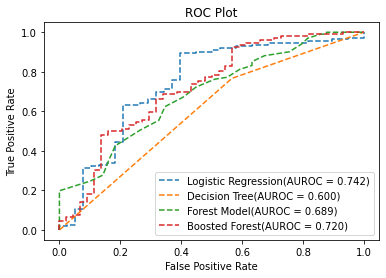

In [148]:
plt.plot(lr_fpr, lr_tpr, linestyle = '--', label = 'Logistic Regression(AUROC = {:.3f})'.format(lr_auc))
plt.plot(dt_fpr, dt_tpr, linestyle = '--', label = 'Decision Tree(AUROC = {:.3f})'.format(dt_auc))
plt.plot(f_fpr, f_tpr, linestyle = '--', label = 'Forest Model(AUROC = {:.3f})'.format(f_auc))
plt.plot(bf_fpr, bf_tpr, linestyle = '--', label = 'Boosted Forest(AUROC = {:.3f})'.format(bf_auc))

#Title
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show legend
plt.legend()

plt.show()

Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal. From the graph above, logistic regression model has the best performance. It also has the highest AUROC score.

## Confusion matrix

In [149]:
from sklearn.metrics import confusion_matrix, classification_report

## Precision, Recall, F1 Score

Precision: out of all positive/negative **predictions** how many you got it right.

Recall: out of all positive/negative **truth** how many you got it right.

F1 Score: 2*(precision*recall)/(precision + recall)

In [150]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize = 14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix,
                        index=class_names, columns = class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot = True, fmt = 'd')
    except ValueError:
        raise ValueError('Confusion matrix values must be integers.')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45, ha = 'right', fontsize = fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [153]:
lr_truth = Y_test_lr
lr_prediction = logistic_model.predict(X_test_lr)

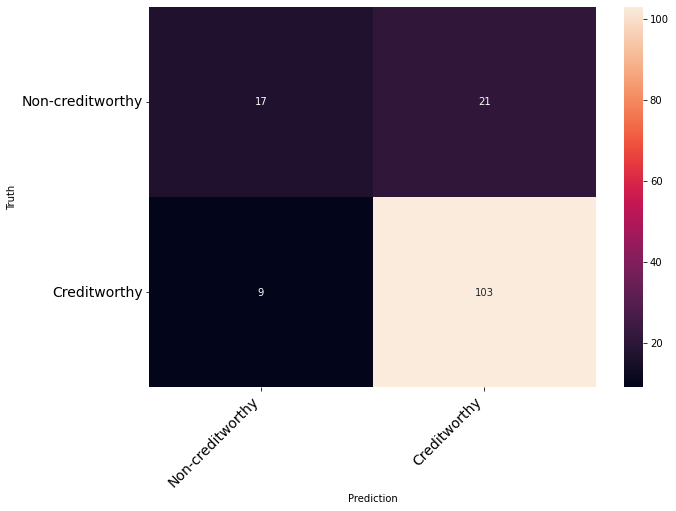

In [157]:
cm_lr = confusion_matrix(lr_truth, lr_prediction)
print_confusion_matrix(cm_lr,['Non-creditworthy','Creditworthy'])

In [160]:
print(classification_report(lr_truth, lr_prediction))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53        38
           1       0.83      0.92      0.87       112

    accuracy                           0.80       150
   macro avg       0.74      0.68      0.70       150
weighted avg       0.79      0.80      0.79       150



In [161]:
dt_truth = Y_test_dt
dt_prediction = tree_model.predict(X_test_dt)

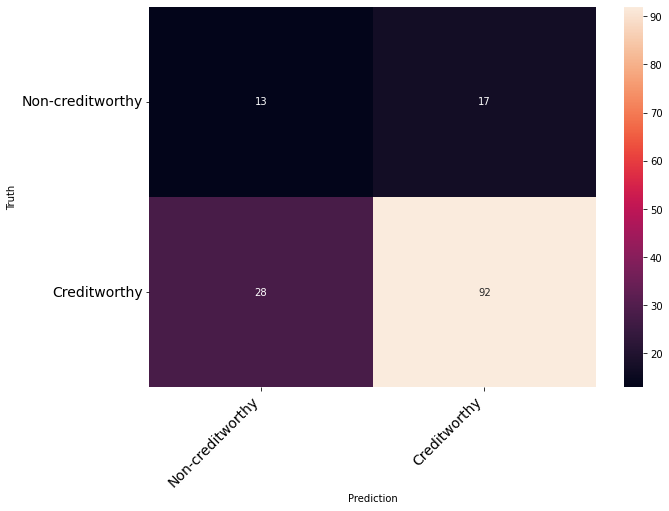

In [162]:
cm_dt = confusion_matrix(dt_truth, dt_prediction)
print_confusion_matrix(cm_dt,['Non-creditworthy','Creditworthy'])

In [163]:
print(classification_report(dt_truth, dt_prediction))

              precision    recall  f1-score   support

           0       0.32      0.43      0.37        30
           1       0.84      0.77      0.80       120

    accuracy                           0.70       150
   macro avg       0.58      0.60      0.58       150
weighted avg       0.74      0.70      0.72       150



In [164]:
f_truth = Y_test_f
f_prediction = forest_model.predict(X_test_f)

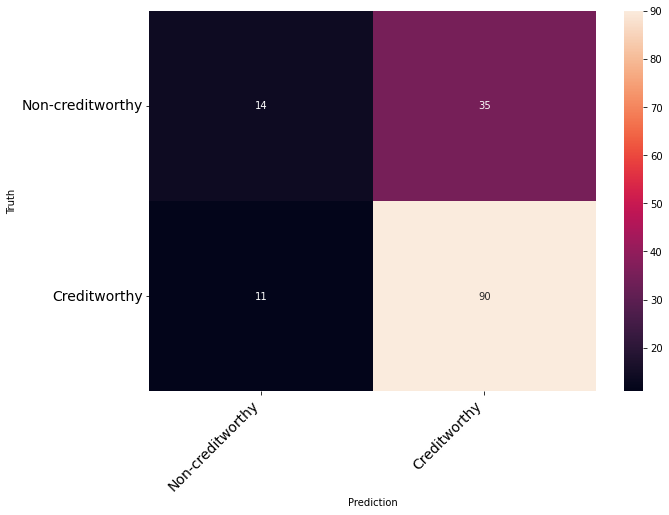

In [165]:
cm_f = confusion_matrix(f_truth, f_prediction)
print_confusion_matrix(cm_f,['Non-creditworthy','Creditworthy'])

In [166]:
print(classification_report(f_truth, f_prediction))

              precision    recall  f1-score   support

           0       0.56      0.29      0.38        49
           1       0.72      0.89      0.80       101

    accuracy                           0.69       150
   macro avg       0.64      0.59      0.59       150
weighted avg       0.67      0.69      0.66       150



In [167]:
bf_truth = Y_test_bf
bf_prediction = boost_model.predict(X_test_bf)

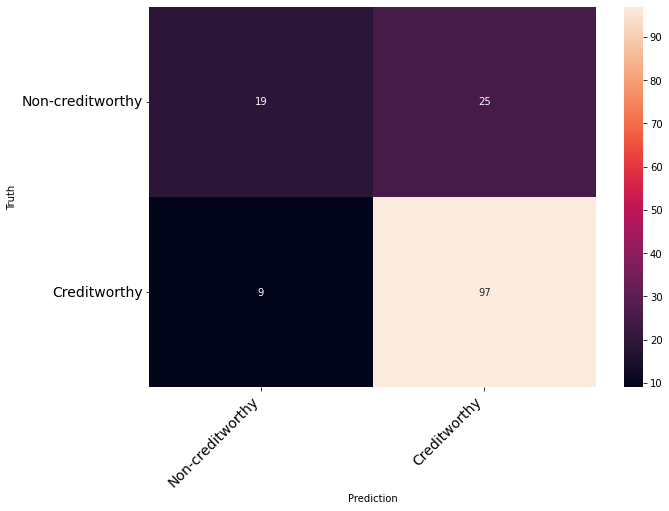

In [168]:
cm_bf = confusion_matrix(bf_truth, bf_prediction)
print_confusion_matrix(cm_bf,['Non-creditworthy','Creditworthy'])

In [169]:
print(classification_report(bf_truth, bf_prediction))

              precision    recall  f1-score   support

           0       0.68      0.43      0.53        44
           1       0.80      0.92      0.85       106

    accuracy                           0.77       150
   macro avg       0.74      0.67      0.69       150
weighted avg       0.76      0.77      0.76       150



The logistic regression model has an overall highest performance. In this way, we choose logistic regression model results.